<a href="https://colab.research.google.com/github/MamoMGD1/AutonomousAI/blob/main/notebooks/Section04_Neural_Networks/Chapter00_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NEURAL NETWORKS**

So far we’ve explored different regression and classification problems. We’ve seen how **gradient descent** could turn any real-life problem into a mathematical pursuit — where all we cared about was minimizing a loss. And it worked. Whether we were predicting house prices or labeling breast cancer patients, we always had a clear path: adjust the parameters, reduce the error.

But there’s something we always kept in the back of our minds…

> **They were all linear.**

Sure, we could use *feature engineering* to twist and stretch the data until it looked a bit more separable — but that’s manual, subjective, and fragile. What we truly want is **a model that discovers nonlinear patterns on its own** — patterns we don’t even know exist.

Why do we have such an obsession with nonlinear patterns?

Because **real life data isn’t linear**.

###**Real Life Examples**

The amount of **sugar in the blood** doesn’t scale linearly with health. Too much of it is dangerous. Too low of it is still dangerous. A single line won’t separate healthy from unhealthy — you’d need a curve, a zone, a boundary that adapts.

And here’s another one:

Let’s say we’re designing a model to predict **risk of heart disease** based on diet. You find that:

- High **sodium (Na)** → High blood pressure (high risk)  
- High **potassium (K)** → Low blood pressure (high risk)

Individually, both are directly proportional to heart disease risk. But **together**, they **balance each other** out. Someone consuming a high dose of sodium is in **high risk of heart diseases**, someone consuming high doses of potassium is also in **high risk**, but someone who uses both is not that concerned.  

So how would you engineer that? Multiply Na × K? Add them? Subtract them?  
And what if there are *dozens* of such interactions you’re unaware of?

And that’s just with **two or three features**.

Now imagine a **100×100 px RGB image** — that's **30,000 input values**, full of patterns in colors and shapes.  
What are you going to do? Draw a few clever lines? Create handcrafted features?

> Linear models can’t handle this scale of interaction. They weren’t meant to.


And don't forget that one of our initial purposes in ML was to **let the machines learn patterns by themselves**, without us hardcoding them what to learn and what to see, otherwise the machines would never get any smarter than humans. The key is to let them learn and see in their own ways, so that they can find new patterns we have never seen.

So, we return to something familiar — the **Perceptron**. A basic linear classifier.  
And we recall the magic of **ensemble learning**, where weak learners were stacked to form powerful models.

That's **exactly** the idea behind **Neural Networks**.

We’re no longer playing with toy problems.  
We’re stepping into a world where models **see**, **hear**, **translate**, **diagnose**, and even **create**.

## **Recalling the Perceptron**

We remember the intuitive and elegant idea behind **perceptrons** — our first attempt to model how a **biological neuron** might work inside a computer. In essence, perceptrons are the digital cousins of the neurons in our brains.

<div align="center">
  <img src="https://raw.githubusercontent.com/MamoMGD1/ML_101/main/images/S04_C00/neuron.png" width="700">
</div>

Inside our brain, a **neuron** receives electrical impulses through its **dendrites**, processes them, and then decides whether to **fire** or not based on how strong the weighted sum of the signals is. Mathematically, this is just:

$$
Z = x_0 w_0 + x_1 w_1 + x_2 w_2 + \dots + x_m w_m
$$

with $m$ being the number of signals (features in perceptrons).  
If this value exceeds a certain **threshold**, the neuron activates and sends a signal through its **axon** to other neurons. That signal travels across **synaptic gaps**, reaching new dendrites and continuing the same process.

---

### **Biological Learning ≈ Weight Tuning**

Neurons in our brain **adapt** over time. The "weights" of the dendritic connections change — some becoming more sensitive, some fading away entirely. This explains beautifully why a **child's brain** is initially overwhelmed and curious — it hasn’t yet tuned these connections. But with experience, those connections sharpen, and the brain starts to make sense of the world.

This process of **weight tuning** is exactly what we're replicating inside computers — only digitally, and with math instead of biology.

---

## **In the Cells Below**

We've built a **Perceptron class** that mimics this exact logic, with a few key modeling choices:

* We use a **sigmoid function** as the **activation function**, which squashes the raw output $Z$ into a value between **0 and 1** — making it suitable for **binary classification** (more explanations were covered in `Section01-Chapter01`).
* Instead of manually computing and separating the **bias term**, we sneak it into the weights by simply adding a **1 at the start of each input** vector.
* Since we are dealing with a binary classification problem, we use the **binary cross-entropy loss function** to measure how good or bad our output predictions are.
* During training, we use **gradient descent** — adjusting the weights by taking steps in the direction that reduces the loss.

At each training step (epoch), we:

1. Compute the predictions using `sigmoid(X . w)`
2. Compare those predictions with the actual labels using binary cross-entropy
3. Calculate how the loss changes with respect to each weight (gradient)
4. Update the weights to reduce the loss

---

### **Results & Decision Boundaries**

After training for **1000 epochs**, we see the loss dropping to a reasonable level. If needed, we could further reduce it with better hyperparameters like a tuned learning rate or more epochs.

What's more impressive is the model’s **generalization**. When tested on unseen data, the **confusion matrix** reveals that only **one sample was misclassified**. That’s a solid performance for such a minimal model.

And when we visualize the **decision boundary**, it's — as expected — a **straight line**, since a **single perceptron** is a **linear classifier**. It can only separate classes with a linear boundary — no curves, no fancy shapes.

---

### **Final Notes on Conventions**

You might’ve noticed in our implementation that we calculate $Z = X . W$, where:

* `X`: matrix of inputs $(n_{\text{samples}}, m_{\text{features}})$
* `W`: weights vector (sized as $m$)
* Result: a vector of predictions for all samples

This is the **standard practice** in most modern machine learning libraries and research papers. Whether you're working in PyTorch, TensorFlow, or scikit-learn, this convention is typically used.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

In [ ]:
class Perceptron:
    def __init__(self, n_features, lr=0.01, random_state=42):
        np.random.seed(random_state)
        self.w = np.random.randn(n_features)  # Initialize weights randomly
        self.lr = lr

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def calculate_loss(self, y_hat, y):
        # Binary cross-entropy loss
        return -np.mean(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9))

    def gradient_loss(self, X, y_hat, y):
        # Compute gradient using chain rule
        sigmoid_derivative = y_hat * (1 - y_hat)
        error = (y_hat - y) * sigmoid_derivative
        return np.dot(X.T, error) / len(y)

    def forward(self, X):
        # Linear combination + activation
        self.z = np.dot(X, self.w)
        return self.sigmoid(self.z)

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            # Forward pass
            self.a = self.forward(X)
            self.loss = self.calculate_loss(self.a, y)

            # Backward pass
            self.dw = self.gradient_loss(X, self.a, y)

            # Update weights (gradient descent)
            self.w = self.w - self.lr * self.dw

            # Print progress every 10%
            if (epoch + 1) % (epochs // 10) == 0:
                print(f'Epoch: {(epoch + 1):>4} | Loss: {self.loss:.4f}')

    def predict(self, X):
        # Classify based on 0.5 threshold
        a = self.forward(X)
        return np.where(a < 0.5, 0, 1)

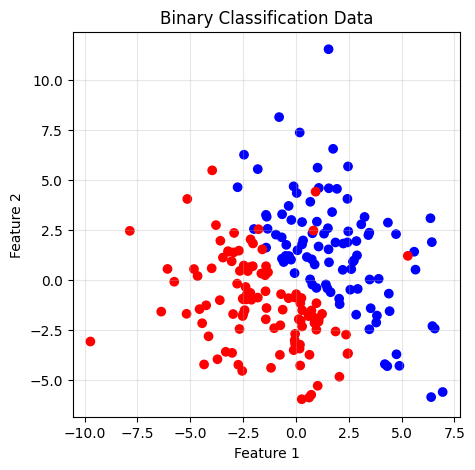

In [ ]:
np.random.seed(42)

# Generate synthetic data
n = 200
X = np.random.normal(loc=0, scale=3, size=(n, 2))
X = np.column_stack((np.ones(n), X))  # Add bias term

# Create labels: class 0 if x1+x2<0, with 10% noise
y = np.where((X[:, 1] + X[:, 2] < 0) | (np.random.random(n) < 0.1), 0, 1)
colors = np.where(y == 0, 'red', 'blue')

# Visualize data
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 1], X[:, 2], c=colors)
plt.grid(alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Data')
plt.show()

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize perceptron with 3 features (bias + 2 inputs)
perceptron = Perceptron(X.shape[1], lr=0.1)

# Train the model
perceptron.train(X_train, y_train)

# Make predictions on test set
test_predictions = perceptron.predict(X_test)

Epoch:  100 | Loss: 0.2760
Epoch:  200 | Loss: 0.2365
Epoch:  300 | Loss: 0.2184
Epoch:  400 | Loss: 0.2076
Epoch:  500 | Loss: 0.2004
Epoch:  600 | Loss: 0.1953
Epoch:  700 | Loss: 0.1916
Epoch:  800 | Loss: 0.1888
Epoch:  900 | Loss: 0.1867
Epoch: 1000 | Loss: 0.1850


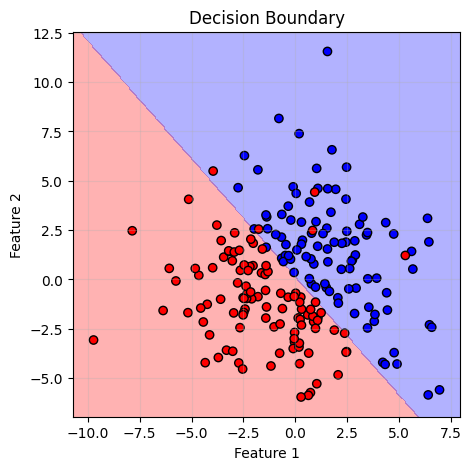

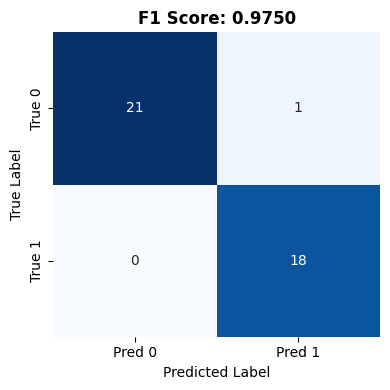

In [ ]:
def plot_decision_surface(model, X, y):
    """Plot decision boundary and data points"""
    # Define plot bounds
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    # Create mesh grid
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Prepare grid for prediction
    grid = np.c_[xx.ravel(), yy.ravel()]
    if X.shape[1] == 3:  # Add bias term if needed
        grid = np.c_[np.ones_like(xx.ravel()), grid]

    # Get predictions and reshape
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and points
    colors = np.where(y == 0, 'red', 'blue')
    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, levels=1, colors=['red', 'blue'])
    plt.scatter(X[:, 1], X[:, 2], c=colors, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.grid(alpha=0.3)
    plt.show()

def plot_confusion_matrix(test_predictions, y_test):
    """Plot confusion matrix with F1 score"""
    cm = confusion_matrix(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions, average='weighted')

    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f"Pred {i}" for i in range(cm.shape[0])],
                yticklabels=[f"True {i}" for i in range(cm.shape[0])])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"F1 Score: {f1:.4f}", fontweight='bold')
    plt.tight_layout()
    plt.show()

# Visualize results
plot_decision_surface(perceptron, X, y)
plot_confusion_matrix(test_predictions, y_test)

## **Stacking Perceptrons into a Layer**

To build a non-linear classifier, we once again draw inspiration from the ultimate model of intelligence — **the human brain**.

Neurons don’t work in isolation. One fires and triggers others; some respond only when many are active. Early neurons detect simple features — like dots or lines — and pass that information forward. This cascading network of signals enables our brain to recognize patterns of remarkable complexity.

For instance, visual neurons might start by detecting **lines**, then combine them to form **shapes**, and finally recognize **objects** such as a butterfly or a car.  
This hierarchical structure is exactly what inspires **stacking perceptrons into layers** in neural networks.

<div align="center">
  <img src="https://raw.githubusercontent.com/MamoMGD1/ML_101/main/images/S04_C00/synapse.png" width="700">
</div>

In code, this concept is represented by the `Linear` class — a *layer of perceptrons* (which we’ll now call **neurons**).

When we initialize such a layer, we no longer use a single vector of weights.  
Instead, we create a **weight matrix** with:

- `in_features` rows → number of input features  
- `out_features` columns → number of neurons in the layer  

Each **column** represents a neuron analyzing the full input vector.  
This lets us stack **many neurons** together within one layer.

---

### **The `backward()` Method**

The backward pass — or **backpropagation** — determines how much each weight contributed to the total error and adjusts it to reduce future errors.  
We’ll explore this process more deeply later in this chapter.

---

### **Shape Compatibility is Key**

Consider the following architecture:

* `Layer1(200, 120)`  
* `Layer2(120, 170)`  
* `Layer3(170, 50)`  
* `Layer4(50, 1)`

This means:

- The network expects **input vectors of 200 features**.  
- It produces **a single output value** at the end.

As data moves forward, the shapes evolve like this:

`(n_samples × 200) → (n_samples × 120) → (n_samples × 170) → (n_samples × 50) → (n_samples × 1)`

At each stage, the output of one layer becomes the input to the next.

📌 **Always ensure:**  
The number of **columns in the input** = number of **rows in the next layer’s weight matrix**.

---

### **Why Stack Perceptrons?**

Each layer gives multiple neurons a chance to interpret the data differently.  
For example:

- The first layer (120 neurons) each form their own *guess* about the output.  
- Their combined output becomes the input for the next layer (170 neurons), which tries to refine those guesses further.

Layer by layer, the network digs deeper — each stage uncovering more **abstract patterns**.  

Think of it like constructing a building:  
we don’t rely on a single person to handle every task.  
We assign **teams** to each phase — foundation, wiring, plumbing, finishing — each contributing their part until the full structure emerges.

That’s exactly how neural networks work: **many small, specialized units collaborating across layers**, transforming simple inputs into complex understanding.

---

The deeper the network goes, the richer the patterns it can learn; but there’s a trade-off.

> **Overfitting:**  
> Every new layer adds more parameters to tune, which increases the risk that the network memorizes the training data instead of learning to generalize from it.


In [ ]:
class Linear:
    def __init__(self, in_features, out_features, activation='ReLU', random_state=42):
        np.random.seed(random_state)
        self.in_features = in_features
        self.out_features = out_features
        self.W = np.random.randn(in_features, out_features)

        # Weight initialization based on activation
        if activation == 'ReLU':
            self.W *= np.sqrt(2 / in_features)  # He initialization
        elif activation in ('Sigmoid', 'Tanh'):
            self.W *= np.sqrt(1 / in_features)  # Xavier initialization

    def forward(self, X):
        """Forward pass: compute X @ W"""
        self.input = X
        self.output = X @ self.W
        return self.output

    def backward(self, grad_output, lr=0.01):
        """Backward pass: compute gradients and update weights"""
        grad_input = grad_output @ self.W.T  # Gradient w.r.t. input
        grad_W = self.input.T @ grad_output  # Gradient w.r.t. weights
        self.W -= lr * grad_W  # Update weights
        return grad_input

## **Activation Functions**

As we mentioned, now that we have those linear perceptron layers—which are already quite powerful by themselves—it seems like stacking those layers together should finally give us those non-linear powerful *neural network*. But… it doesn't.

**Why not?**

Well, think about it. If all we’re doing is feeding the input $X$ into a bunch of layers that **just multiply it by weight matrices**, then this is what happens:

$$
\hat{y} =
W_3 \left\{
\underbrace{
W_2 \left\{
\underbrace{
W_1 \cdot X
}_{\text{Layer 1 Output}}
\right\}
}_{\text{Layer 2 Output}}
\right\}
= \underbrace{
(W_3 \cdot W_2 \cdot W_1) \cdot X
}_{\text{Still Linear Overall (No Activation)}}
$$

This is still a **single linear transformation**. No matter how many layers we stack, we’re just multiplying our inputs by one big matrix in the end. **So the model remains linear**, and that’s not what we expected.

### **So What's Missing?**

**Activation functions** are missing. They're the magic ingredient that breaks the linearity and allows neural networks to learn highly complex, non-linear functions.

Activation functions are just small mathematical operations applied to the output of each neuron. They **transform the values** in a non-linear way, it would try twisting, bending, and transforming our initial linear models, and this non-linearity is what makes it powerful.

Let’s go through the most common ones.

---

### **Sigmoid Function**

The sigmoid squashes all values into the range (0, 1). It’s especially useful in binary classification.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Its derivative (used in backpropagation):

$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

<div align="center">
  <img src="https://raw.githubusercontent.com/MamoMGD1/ML_101/main/images/S04_C00/sigmoid.png" width="500">
</div>

It's so smooth and easy to differentiate, but unfortunately has a high risk of **Gradient Vanishing** (we are going to explain it later in this chapter).

---

### **ReLU (Rectified Linear Unit)**

The most widely used activation. It's super simple:

$$
f(x) = \max(0, x)
$$

Its derivative:

$$
f'(x) =
\begin{cases}
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}
$$

<div align="center">
  <img src="https://raw.githubusercontent.com/MamoMGD1/ML_101/main/images/S04_C00/relu.png" width="500">
</div>

It's fast and efficient and mostly avoids vanishing gradients but it can lead to “dead neurons” when gradients are zero.  
That's why some might prefer **Leaky ReLU** instead of it.

---

### **Leaky ReLU**

Unlike ReLU, which outputs zero for all negative inputs (and may lead to "dead neurons"), **Leaky ReLU** allows a small, non-zero gradient when the unit is not active (i.e., when input is negative).

$$
f(x) =
\begin{cases}
x & \text{if } x \geq 0 \\
\alpha x & \text{if } x < 0
\end{cases}
$$

Where $\alpha$ is a small constant like **0.01**.

$$
f'(x) =
\begin{cases}
1 & \text{if } x \geq 0 \\
\alpha & \text{if } x < 0
\end{cases}
$$

<div align="center">
  <img src="https://raw.githubusercontent.com/MamoMGD1/ML_101/main/images/S04_C00/leaky_relu.png" width="500">
</div>

* When $\alpha = 0$, it becomes standard ReLU.
* Typical value of $\alpha$ is between 0.01 and 0.3.
* The small slope for negative values helps keep the neuron active even when the input is negative, solving the **dying ReLU** problem.

---

### **Tanh Function**

Tanh is like sigmoid, but squashes values between **-1 and 1**, and it’s **zero-centered**, which is often better.

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

$$
\tanh'(x) = 1 - \tanh^2(x)
$$

<div align="center">
  <img src="https://raw.githubusercontent.com/MamoMGD1/ML_101/main/images/S04_C00/tanh.png" width="500">
</div>

It's better than sigmoid in most cases but still can have vanishing gradients.

---

### **Softmax Function**

Used **only in the final layer** of classification networks for **multi-class problems**. It converts a vector of scores into **probabilities** that sum to 1.

$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

This way, large scores become even larger, small scores become smaller, and the output becomes a clear probability distribution.

Example:
If our model's output is:  
`{'cat': 0.25, 'dog': -12, 'horse': 8, 'bird': 0}`  
Softmax will turn them into something like:  
`{'cat': 0.02, 'dog': 0.00, 'horse': 0.97, 'bird': 0.01}`  
Which is easily interpretable for humans. The values are clear confidence levels of our model for each of the classes, not just some scores.

---

###**The Magic Explained**

Every time we apply an **activation function**, we stop the matrix multiplications from collapsing into one giant linear operation. These functions **distort the input space**, allowing the network to learn twists, bends, and non-obvious relationships in the data.

Without them?
It’s just a stack of linear equations.

In [ ]:
class Sigmoid:
    def forward(self, X):
        self.out = 1 / (1 + np.exp(-X))
        return self.out

    def backward(self, grad_output, lr=None):
        # Derivative: σ(x) * (1 - σ(x))
        return grad_output * self.out * (1 - self.out)

class ReLU:
    def __init__(self, alpha=0):
        self.alpha = alpha  # Leaky ReLU parameter

    def forward(self, X):
        self.input = X
        return np.where(X >= 0, X, self.alpha * X)

    def backward(self, grad_output, lr=None):
        # Derivative: 1 if x>=0, else alpha
        grad = np.where(self.input >= 0, 1, self.alpha)
        return grad_output * grad

class Tanh:
    def forward(self, X):
        self.out = np.tanh(X)
        return self.out

    def backward(self, grad_output, lr=None):
        # Derivative: 1 - tanh²(x)
        return grad_output * (1 - self.out ** 2)

class Softmax:
    def forward(self, X):
        # Numerical stability: subtract max
        exp = np.exp(X - np.max(X, axis=1, keepdims=True))
        self.out = exp / np.sum(exp, axis=1, keepdims=True)
        return self.out

    def backward(self, grad_output, lr=None):
        # Simplified when paired with cross-entropy loss
        return grad_output

## **Loss Functions**

So far, we've built a network that processes input data and produces outputs by passing them through multiple **layers of neurons** and **activation functions**. But how do we know if the predictions our model makes are any good? How do we measure the **mistakes** it's making?

That's why we have **Loss Functions**.

Think of a loss function as a guide—it tells the model **how wrong it is**, and by how much. The **higher** the loss, the **further** the predictions are from the actual targets. The **lower** the loss, the **closer** we are to making perfect predictions. During training, the goal of our optimization algorithms like Gradient Descent is to **minimize this loss** by adjusting the weights inside the network.

There are different types of loss functions depending on the kind of task we’re solving—whether it's **regression**, **binary classification**, or **multi-class classification**. Below are some of the most common ones:

### **Mean Squared Error (MSE)**

This one is intuitive and simple: it measures the **average of the squares of the differences** between predicted and actual values.

$$
\mathcal{L}_{\text{MSE}} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$
$$
\frac{\partial \mathcal{L}}{\partial \hat{y}} = \frac{2}{n} (\hat{y} - y)
$$
* If the predictions \$\hat{y}\_i\$ are close to the actual values \$y\_i\$, the loss will be small.
* If just one prediction is way off, its square will heavily increase the total loss.

It's great for continuous predictions in regression problems and not ideal for classification, since it doesn't understand probabilities.

---

### **Binary Cross Entropy (BCE)**

When our model’s output is a probability for two classes (usually via a **sigmoid** activation), we need a loss function that understands that output as a **likelihood** of the true label. That’s where BCE comes in.

$$
\mathcal{L}_{\text{BCE}} = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
$$
$$
\frac{\partial \mathcal{L}}{\partial \hat{y}} = - \frac{1}{n} \left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right) = \frac{\hat{y} - y}{\hat{y}(1 - \hat{y})}
$$
* If the model confidently predicts the correct class (e.g., $\hat{y}_i \approx 1$ when $y_i = 1$), the loss is near zero.
* If the model is confident on a **wrong** class, the loss skyrockets.

It works perfectly with sigmoid output for binary classification when the labels are $\{0,1\}$.

---

### **Cross Entropy Loss**

This is the multi-class version of BCE. When the output of a model is a vector of scores (usually passed through a **softmax**), this loss evaluates how well the predicted **probability distribution** matches the true class label.

For a single sample with \$C\$ classes:

$$
\mathcal{L}_{\text{CE}} = - \sum_{c=1}^{C} y_c \cdot \log(\hat{y}_c)
$$
$$
\frac{\partial \mathcal{L}}{\partial \hat{y}_i} = \hat{y}_i - y_i
$$
* Here, \$y\_c\$ is 1 only for the correct class, and 0 otherwise (one-hot encoded).
* So essentially, we only care about the predicted probability of the correct class.
* The closer \$\hat{y}\_c\$ is to 1, the smaller the loss.

It's ideal for classification tasks where the output must pick one class among many.

---

##**Usage of Gradients**

In conclusion, loss functions are the **compass** of learning. They don’t just say *how wrong* a prediction is — they show **which direction to move in** to get better. The gradients we compute from these loss functions are the arrows on this compass.

These gradients are then passed into **Gradient Descent** — our optimization engine — which updates the model’s weights to **minimize** the loss step by step. If loss is high, gradients are large, and the model makes bold corrections. If the loss is small, gradients are subtle, making gentle refinements.

> Generally, if the predictions of the model are **bigger** than the real values, the gradients are going to be **Positive**. The weights are then **decreased**.  
> If the predictions are **smaller** than the real values, the gradients become **Negative**, resulting in weight **increases**.

Without a proper loss function, a network would have no sense of right or wrong — no feedback, no direction, no improvement.

Let your model **fail fast**, **fail loud**, and **learn fiercely**. That’s what loss functions are for.

In [ ]:
class MSELoss:
    def forward(self, y_hat, y):
        """Mean Squared Error loss"""
        self.y_hat = y_hat
        self.y = y.reshape(y_hat.shape)
        return np.mean((self.y_hat - self.y) ** 2)

    def backward(self):
        """Gradient: 2(ŷ - y) / n"""
        return 2 * (self.y_hat - self.y) / len(self.y)

class BCELoss:
    def forward(self, y_hat, y):
        """Binary Cross-Entropy loss"""
        eps = 1e-9
        self.y_hat = np.clip(y_hat, eps, 1 - eps)  # Numerical stability
        self.y = y.reshape(y_hat.shape)
        return -np.mean(self.y * np.log(self.y_hat) + (1 - self.y) * np.log(1 - self.y_hat))

    def backward(self):
        """Gradient: (ŷ - y) / (ŷ(1-ŷ))"""
        eps = 1e-9
        return (self.y_hat - self.y) / (self.y_hat * (1 - self.y_hat) + eps) / len(self.y)

class CrossEntropyLoss:
    def forward(self, y_hat, y):
        """Cross-Entropy loss for multi-class classification

        Args:
            y_hat: (n_samples, n_classes) - softmax probabilities
            y: (n_samples,) - class indices
        """
        eps = 1e-9
        self.y_hat = np.clip(y_hat, eps, 1 - eps)
        self.y = y.astype(int)

        # One-hot encode labels
        self.y_onehot = np.zeros_like(self.y_hat)
        self.y_onehot[np.arange(len(y)), self.y] = 1

        # Compute loss
        loss = -np.sum(self.y_onehot * np.log(self.y_hat)) / len(y)
        return loss

    def backward(self):
        """Gradient: (ŷ - y_onehot) / n"""
        return (self.y_hat - self.y_onehot) / len(self.y)

##**Multi-Layer Perceptron (MLP)**

A **Multi-Layer Perceptron (MLP)** is what we get when we **stack multiple linear layers**, each followed by a **non-linear activation function**. This simple structure becomes a powerful architecture capable of learning complex, non-linear patterns in data — and it's the very foundation of what we now call **Deep Neural Networks** (usually defined as having more than three hidden layers) and **Deep Learning**.

---

###**How Training Works**
The training process follows a set of steps. We would first **initialize weights** of all the neurons (more on weight initialization later in this chapter) and then repeatedly:

1. **Forward Pass**: Push the input through all layers to get a prediction.
2. **Compute Loss**: Measure how far off the prediction is from the true value.
3. **Backpropagation**: Use the chain rule to compute how each weight contributed to the error.
4. **Weight Update**: Adjust the weights slightly to reduce the error next time.

---
###**What Is Backpropagation?**

Backpropagation is the algorithm that made deep learning *actually possible*. It's how a neural network figures out which weights caused the error — and how to adjust them to do better next time.

It relies on a brilliant tool from calculus, **the chain rule**, which tells us how to compute the derivative of a function that’s made up of *nested* functions.

If your network is doing something like this:

$$
\hat{y} = f_3(f_2(f_1(X.W_1).W_2).W_3)
$$

in which $f_i$ is the activation function in the layer $i$ and $W_i$ is the weights.

Then the gradient of the loss $L$ with respect to the input $X$ is computed as:

$$
\frac{dL}{dx} = \frac{dL}{df_3} \cdot \frac{df_3}{df_2} \cdot \frac{df_2}{df_1} \cdot \frac{df_1}{dx}
$$

That's the **chain rule** in action. Backpropagation automates this process across *all layers* of your network.

---

###**Why Is It So Efficient?**

Without backpropagation, you'd have to slightly tweak *every* weight and rerun the forward pass just to see how the loss changes. That would be very slow with $O(n^2)$ computation complexity and completely impractical for deep networks.

But with the chain rule and some clever math tricks, **backpropagation reduces the cost to just $O(n)$** — the same as a single forward pass.  
This is what made deep learning scale.

---

###**A Closer Look at the Computation**

Here's how the gradients move layer by layer in code logic:

- `grad_output`: The gradient passed down from the next layer (or the final loss).
- `grad_input = grad_output @ self.W.T`: Pushes the error backward to the previous layer.
- `grad_W = self.input.T @ grad_output`: Computes the gradient of the weights using the original input and current error.
- `self.W -= lr * grad_W`: Applies gradient descent — update weights in the direction that *lowers* the loss.

Every layer just repeats these steps, from last to first which as you can see, it's time complexity is just $O(n)$.

Without backpropagation, deep neural networks would still be a beautiful idea — but one that’s **impossible to train** efficiently.

---

###**Tuning the Architecture (Hyperparameters)**

Designing an MLP means tuning many decisions:

* **Number of layers** (a.k.a. depth)
* **Number of neurons per layer** (a.k.a. width)
* **Volume of training data** and **batch sizes**
* **Activation function types** (ReLU, Sigmoid, Tanh, Leaky ReLU, etc.)
* **Order of layers or block structures** (e.g., ReLU-Linear vs Linear-ReLU)
* **Weight initialization strategy**
* **Learning rate, number of epochs, optimizers, regularization techniques...**

Each one affects how the network learns and how expressive (or stable) it becomes.

In [ ]:
class MLP:
    def __init__(self, layers, loss_fn):
        self.layers = layers
        self.loss_fn = loss_fn

    def forward(self, X):
        """Forward pass through all layers"""
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, grad, lr=0.01):
        """Backward pass through all layers (reversed)"""
        for layer in reversed(self.layers):
            grad = layer.backward(grad, lr=lr)
        return grad

    def predict(self, X):
        """Binary classification prediction (threshold=0.5)"""
        out = self.forward(X)
        return (out >= 0.5).astype(int)

    def train(self, X, y, X_test, y_test, epochs=1000, lr=0.01, batch_size=32, bin_class=False):
        """Train the MLP with mini-batch gradient descent"""
        n_samples = X.shape[0]
        loss_history = []
        accuracy_history = []

        for epoch in range(epochs):
            # Shuffle data each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            epoch_losses = []

            # Mini-batch training
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]

                # Forward pass
                out = self.forward(X_batch)

                # Compute loss
                epoch_losses.append(self.loss_fn.forward(out, y_batch))

                # Backward pass
                grad = self.loss_fn.backward()
                self.backward(grad, lr=lr)

            loss_history.append(np.mean(epoch_losses))

            # Evaluate on test set
            if bin_class:
                y_hat = self.predict(X_test)
            else:
                y_hat_prob = self.forward(X_test)
                y_hat = np.argmax(y_hat_prob, axis=1)

            accuracy_history.append(f1_score(y_test, y_hat, average='weighted'))

            # Print progress every 10%
            if (epoch + 1) % (epochs // 10) == 0:
                print(f"Epoch {(epoch + 1):>4}: Loss={loss_history[-1]:.4f} | F1={accuracy_history[-1]:.4f}")

        return loss_history, accuracy_history

### **Weight Initialization**

Initializing weights **matters more than you think**. The wrong strategy can stop learning altogether — either because the gradients explode or vanish.  
Another important thing on weight initializaiton is the fact that the loss surface of a neural network is typically a chaotic, high-dimensional landscape filled with countless local minima and saddle points. A good weight initialization helps us start from a reasonable spot in this complex terrain, reducing the risk of getting trapped in poor local minima too early. It gives the optimizer a better chance to explore the space more effectively, guiding the network toward deeper valleys where better solutions may lie.

<div align="center">
  <img src="https://raw.githubusercontent.com/MamoMGD1/ML_101/main/images/S04_C00/3d_space.png" width="400">
  <h6>Figure: A Loss surface full of local minima and saddle points</h6>
</div>

###**What NOT to Do:**

* **Initializing all the weights by a constant number**:

  * All neurons in a layer will update identically.
  * This symmetry means each layer has the functionality of just one neuron!

* **Random values between 0 and 1**:

  * Outputs of each layer will keep shrinking.
  * In sigmoid or tanh, this drives activations into saturation zones → **tiny gradients → vanishing gradients**.

* **Random values between -1 and 1 or N(0,1)**:

  * Better, but still often causes vanishing gradients due to uncontrolled variance across layers.

---

### **Better Initialization Strategies**

####**Xavier Initialization (Glorot)**

Best for **sigmoid** or **tanh**, keeps the variance of activations consistent across layers.

$$
W \sim \mathcal{U}\left(-\sqrt{\frac{6}{n_{in} + n_{out}}}, \sqrt{\frac{6}{n_{in} + n_{out}}}\right)
$$

Or from a normal distribution:

$$
W \sim \mathcal{N}\left(0, \frac{1}{n_{in}}\right)
$$

####**He Initialization**

Optimized for **ReLU** or **Leaky ReLU** — focuses only on number of input neurons:

$$
W \sim \mathcal{N}\left(0, \frac{2}{n_{in}}\right)
$$

This prevents early layers from pushing too many activations to zero.

###**Tuning Learning Rate**

The **learning rate** controls how big of a step we take during each weight update. Choosing it wisely is also crucial:

- **Too low** → Training becomes painfully slow. The weights creep forward in tiny steps, and convergence takes a lot of time and energy.
- **Too high** → The model may never converge. Each update overshoots the optimal region and the loss may bounce around wildly or even explode.
- A moderate learning rate ensures that the model moves steadily towards lower loss without overshooting or stagnating.

> Think of it like taking a **freekick in soccer**:  
> If you shoot too hard, the ball flies out of the stadium.  
> If you tap it too softly, it never even reaches the goal.  
> You need that perfect balance of power and control.

<div align="center">
  <img src="https://raw.githubusercontent.com/MamoMGD1/ML_101/main/images/S04_C00/learning_rate.png" width="350">
</div>

Sometimes, a **high learning rate** might also trap the model in an odd corner of the loss surface — causing it to stop updating altogether before learning anything meaningful.

###**Splitting The Dataset**

To train and evaluate a model properly, we split our dataset into **three distinct parts**, each with its own mission:

####**Training Set (\~70%)**

This is the workout zone for your model. It’s used to **learn the parameters (weights and biases)** — in other words, it’s where your model adjusts itself to minimize the loss using optimization algorithms like gradient descent.

####**Validation Set (\~10%)**

Once the model has trained, we give it a mini-test. The validation set is used to **tune hyperparameters** (like learning rate, architecture, number of layers...) and to compare different versions of models.  
**It's important to note that:** The model *can see* this data during development, but it should never train on it.

####**Test Set (\~20%)**

This is the **final exam**, and it's sacred. The model **must not touch this set** during training or validation. It represents data the model has **never seen before** and gives us an honest evaluation of how it will perform in the real world.  
If you change your model after seeing test performance, it **stops being a test set** — it becomes a validation set! **So, Don't Do That!**

### **Common Pitfalls**

#### **Gradient Vanishing**

When using activation functions like **Sigmoid** or **Tanh** with **poor weight initialization**, the outputs often become very small (close to 0) or saturated (close to 1).  
In both cases, the **gradients during backpropagation** become **extremely small** — especially in the earlier layers.  

Since each layer’s gradient depends on the product of gradients from later layers, these tiny values **shrink exponentially** as they move backward.  
As a result, earlier layers receive almost **no signal to update**, so the network stops learning effectively — it’s as if the learning “dies out” from the front to the back.

> **In short:** large or poorly scaled weights + bounded activations = gradients fade away.

---

#### **Exploding Gradients**

When weights are initialized with **too much variance**, or when there are **many layers multiplying large values**, the gradients can grow exponentially during backpropagation.  
This leads to **unstable updates**, where weights swing wildly between iterations, preventing convergence.  

Training becomes chaotic — the loss fluctuates or diverges entirely — and the model fails to settle into any useful pattern.

> **In short:** too-large or unbalanced weights amplify gradients until the training process breaks down.

---

#### **Dead Neurons**

When using **ReLU**, neurons output zero for any negative input.  
If the weights are initialized poorly or if inputs often fall below zero, some neurons may **only ever see negative values**, causing them to **output zero forever**.  

Because ReLU’s gradient is also zero in this region, these neurons **never activate again** — they’re called **dead neurons**.  
Once dead, they don’t contribute to learning or predictions anymore, effectively wasting part of the network’s capacity.

> **In short:** too-large negative weights or biased inputs can permanently “kill” neurons in ReLU layers.

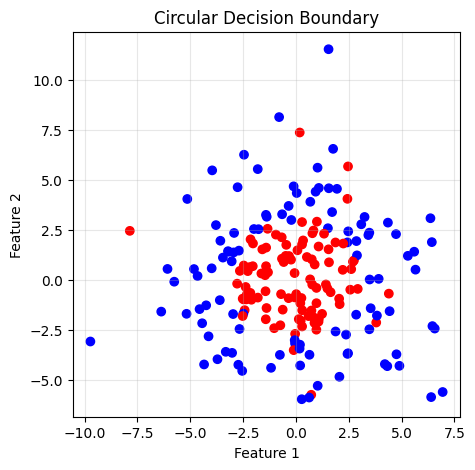

Epoch  100: Loss=0.6630 | F1=0.4740
Epoch  200: Loss=0.6257 | F1=0.4035
Epoch  300: Loss=0.5879 | F1=0.4035
Epoch  400: Loss=0.5358 | F1=0.4791
Epoch  500: Loss=0.4830 | F1=0.5473
Epoch  600: Loss=0.4374 | F1=0.6955
Epoch  700: Loss=0.4002 | F1=0.7751
Epoch  800: Loss=0.3709 | F1=0.8500
Epoch  900: Loss=0.3472 | F1=0.8995
Epoch 1000: Loss=0.3285 | F1=0.8995


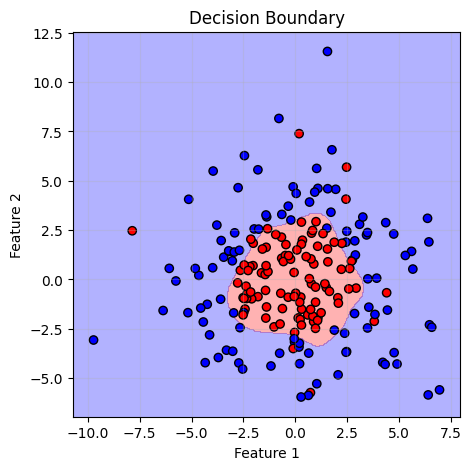

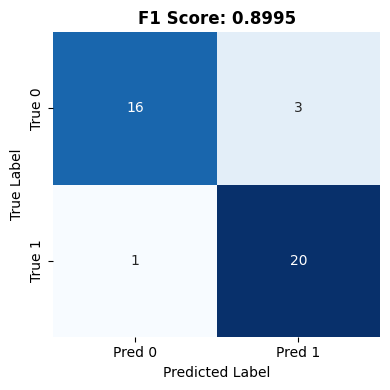

In [ ]:
np.random.seed(42)

# Generate circular decision boundary with noise
y = np.where((X[:, 1]**2 + X[:, 2]**2 < 9) | (np.random.random(n) < 0.1), 0, 1)
colors = np.where(y == 0, 'red', 'blue')

# Visualize data
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 1], X[:, 2], c=colors)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Circular Decision Boundary')
plt.grid(alpha=0.3)
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build MLP: Input → 10 (Tanh) → 1 (Sigmoid)
n_features = X_train.shape[1]
layers = [
    Linear(n_features, 10),
    Tanh(),
    Linear(10, 1, 'Sigmoid'),
    Sigmoid()
]

# Train model
model = MLP(layers, BCELoss())
loss_history, accuracy_history = model.train(
    X_train, y_train, X_test, y_test,
    epochs=1000, lr=0.02, bin_class=True
)

# Evaluate and visualize
test_predictions = model.predict(X_test).flatten()
plot_decision_surface(model, X, y)
plot_confusion_matrix(test_predictions, y_test)

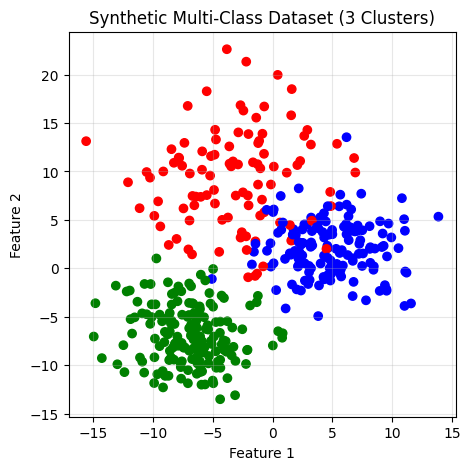

Epoch   10: Loss=0.3164 | F1=0.9036
Epoch   20: Loss=0.1550 | F1=0.9527
Epoch   30: Loss=0.1185 | F1=0.9524
Epoch   40: Loss=0.1235 | F1=0.9411
Epoch   50: Loss=0.1306 | F1=0.9760
Epoch   60: Loss=0.1276 | F1=0.9642
Epoch   70: Loss=0.1308 | F1=0.9524
Epoch   80: Loss=0.1280 | F1=0.9397
Epoch   90: Loss=0.1114 | F1=0.9642
Epoch  100: Loss=0.1208 | F1=0.9642


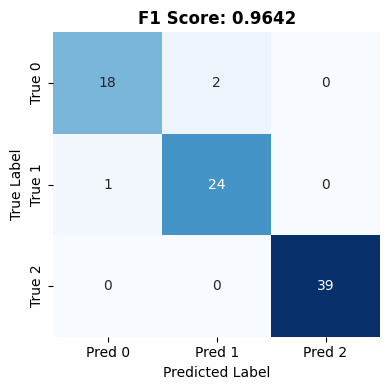

In [ ]:
# Generate a synthetic multi-class dataset using sklearn's make_blobs
from sklearn.datasets import make_blobs

# Create 3 clusters (classes) with different sample sizes and standard deviations
X_blobs, y_blobs = make_blobs(
    n_samples=[100, 150, 170],
    random_state=42,
    cluster_std=[5, 3, 3]
)

# Add a bias term (column of ones) to the input features
X_blobs = np.column_stack((np.ones(X_blobs.shape[0]), X_blobs))

# Assign colors for visualization based on class labels
colors = np.where(y_blobs == 0, 'red', np.where(y_blobs == 1, 'blue', 'green'))

# Visualize the dataset
plt.figure(figsize=(5, 5))
plt.scatter(X_blobs[:, 1], X_blobs[:, 2], c=colors)
plt.grid(alpha=0.3)
plt.title("Synthetic Multi-Class Dataset (3 Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_blobs, y_blobs, test_size=0.2, random_state=42
)

# Define model dimensions
n_features = X_train.shape[1]  # input size (including bias)
n_classes = 3                  # number of output classes

# Define the neural network architecture
layers = [
    Linear(n_features, 26),  # Input layer → Hidden layer with 26 neurons
    ReLU(),                  # Activation to introduce non-linearity
    Linear(26, n_classes),   # Hidden layer → Output layer
    Softmax()                # Converts raw scores into class probabilities
]

# Create the MLP model with Cross-Entropy loss
model = MLP(layers, CrossEntropyLoss())

# Train the model and store the loss & accuracy history
loss_history, accuracy_history = model.train(
    X_train, y_train, X_test, y_test,
    epochs=100,
    lr=0.2
)

# Get predictions on the test set
test_predictions = model.forward(X_test)
test_predictions = np.argmax(test_predictions, axis=1)  # convert probabilities → class indices

# Plot the confusion matrix to evaluate classification performance
plot_confusion_matrix(test_predictions, y_test)

In [ ]:
# Import MNIST dataset and transformation utilities from torchvision
from torchvision.datasets import MNIST
from torchvision import transforms

# Define a transformation pipeline:
# 1. Convert each image to a tensor
# 2. Flatten the 28x28 image into a 784-element vector
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))
])

# Download and prepare the training and test datasets
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

# Convert datasets into NumPy arrays and add a bias term (column of ones)
X_train = np.column_stack((
    np.ones(len(train_dataset)),                         # bias term
    np.vstack([d[0].numpy() for d in train_dataset])     # flattened images
))
X_test = np.column_stack((
    np.ones(len(test_dataset)),                          # bias term
    np.vstack([d[0].numpy() for d in test_dataset])      # flattened images
))

# Extract labels from datasets and convert them to integer arrays
y_train = np.array([d[1] for d in train_dataset]).astype(int)
y_test = np.array([d[1] for d in test_dataset]).astype(int)

# Define the number of features (including the bias term)
n_features = X_train.shape[1]

Epoch    4: Loss=0.5712 | F1=0.8714
Epoch    8: Loss=0.4135 | F1=0.8963
Epoch   12: Loss=0.3596 | F1=0.9081
Epoch   16: Loss=0.3287 | F1=0.9138
Epoch   20: Loss=0.3071 | F1=0.9174
Epoch   24: Loss=0.2902 | F1=0.9224
Epoch   28: Loss=0.2762 | F1=0.9254
Epoch   32: Loss=0.2643 | F1=0.9279
Epoch   36: Loss=0.2538 | F1=0.9304
Epoch   40: Loss=0.2444 | F1=0.9326


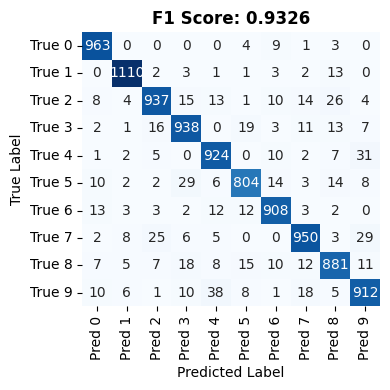

In [ ]:
np.random.seed(42)

# Define the neural network architecture for MNIST
layers = [
    Linear(n_features, 100),  # Input layer → Hidden layer with 100 neurons
    ReLU(),                   # Non-linear activation to introduce complexity
    Linear(100, 10),          # Hidden layer → Output layer with 10 neurons (digits 0-9)
    Softmax()                 # Converts raw scores into probabilities for each class
]

# Initialize the MLP with Cross-Entropy loss
mlp = MLP(layers, CrossEntropyLoss())

# Train the model on MNIST
loss_history, accuracy_history = mlp.train(
    X_train, y_train, X_test, y_test,
    epochs=40,
    lr=0.001
)

# Predict probabilities for the test set
y_pred_probs = mlp.forward(X_test)  # Shape: (num_samples, num_classes)

# Convert predicted probabilities into class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Plot the confusion matrix to evaluate performance on test data
plot_confusion_matrix(y_pred, y_test)

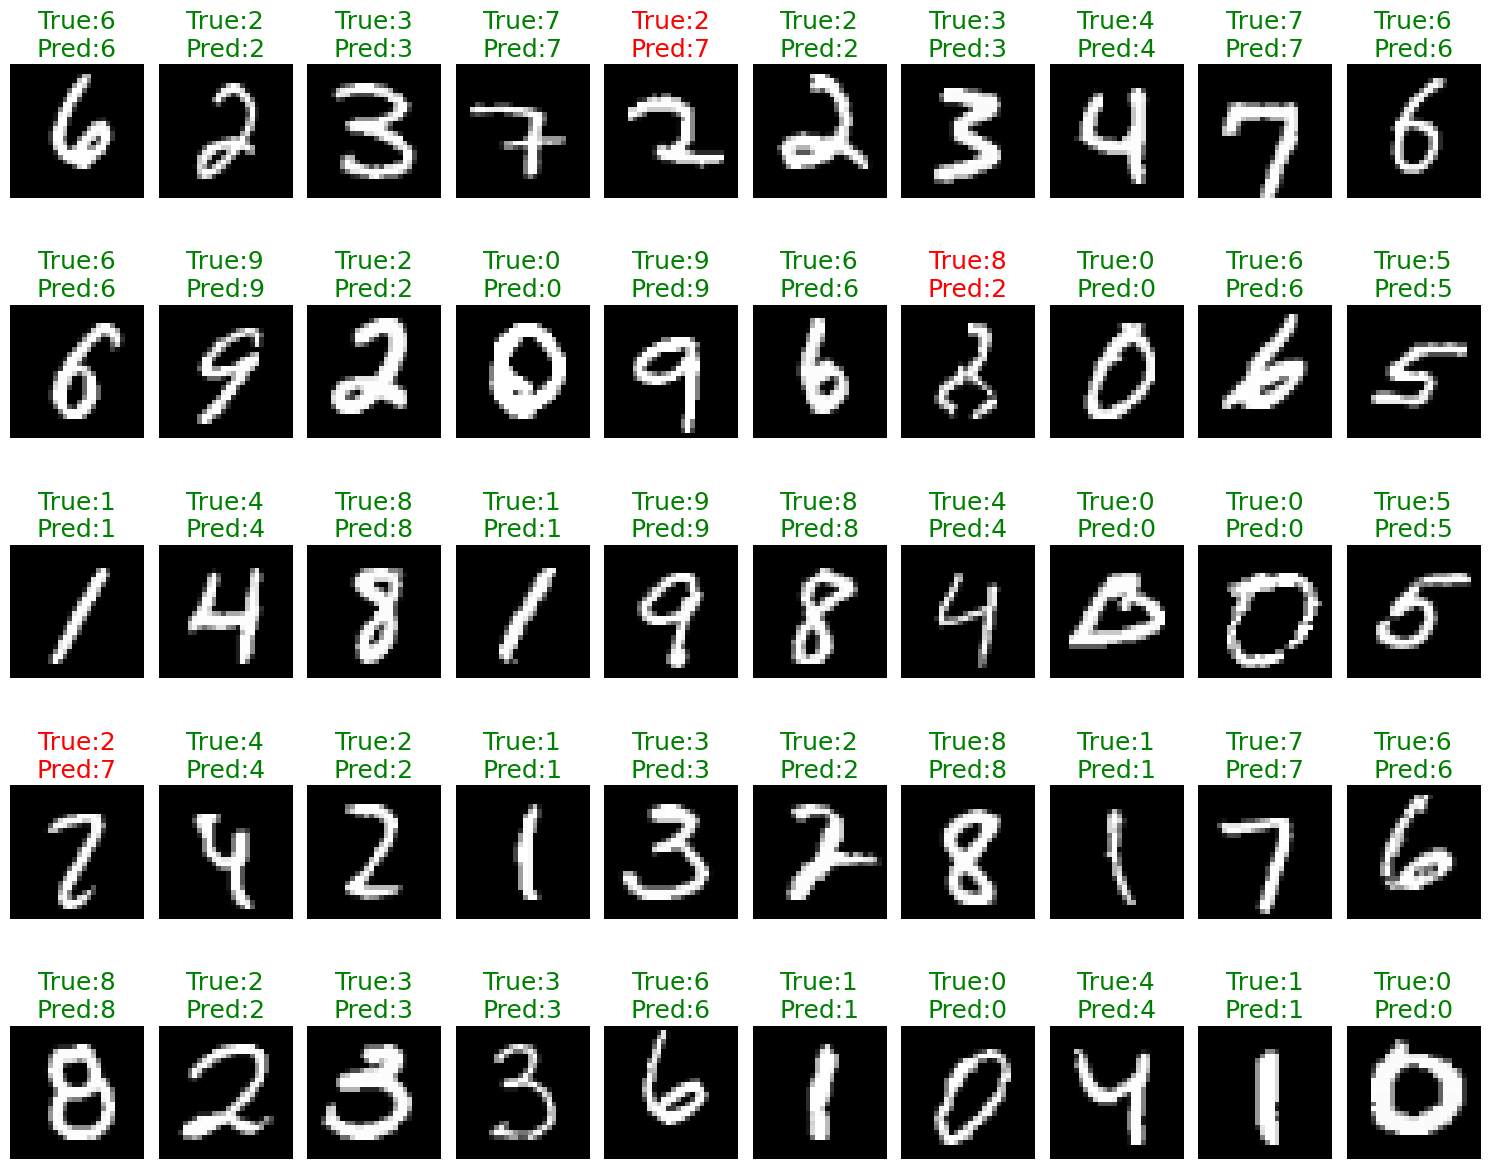

In [ ]:
def show_sample_predictions(X, y_true, y_pred, num_samples=50, random_state=42):
    assert num_samples % 10 == 0, "This function assumes 10 plots per row."
    np.random.seed(random_state)
    indices = np.random.choice(len(X), num_samples, replace=False)

    rows = num_samples // 10
    plt.figure(figsize=(15, rows * 2.5))  # Height scales with number of rows

    for i, idx in enumerate(indices):
        plt.subplot(rows, 10, i + 1)  # rows x 10 grid
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True:{y_true[idx]}\nPred:{y_pred[idx]}', fontsize=18, color='green' if y_true[idx]==y_pred[idx] else 'red')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

show_sample_predictions(X_test[:,1:], y_test, y_pred)

##**Optimization Algorithms**

Optimizers are the algorithms used to help our models **converge** in a better — or at least *faster* — way toward a global minimum of the loss function. This matters deeply because **the entire point of training a model is to find the best set of parameters that minimize the loss** — and do it *efficiently*.

Think about this: imagine you wanted to train an AI model that could automatically review your code, detect bugs, and suggest fixes, and more... Impressive, right? But what if I told you that training such a model would cost:

- **12 TB** of RAM just to hold the weights,
- **2 weeks** of GPU compute to process each training epoch,
- and **1.2 gigawatts** of power (yes, *Back to the Future* levels)

You'd probably say, "Never mind, I’ll debug my code manually."

The point is: when dealing with **small models**, inefficient optimizers might not matter much. But as we scale up to **deep neural networks** with **millions or billions of parameters**, even small improvements in optimization can lead to massive savings in time, energy, and cost — **without sacrificing performance**.

That’s why here, we’ll explore some of the most powerful and well-researched optimization algorithms that drive real-world AI.

###**Vanilla Gradient Descent**

So far in this course, every time we updated the weights of a model, we were using an algorithm known as **Gradient Descent**. The idea is quite intuitive:

> Wherever you are on the loss surface, take a step in the direction that **most decreases the loss**. That direction is given by the **negative gradient** of the loss.

The steeper the slope, the more aggressively you descend. If it’s flat, you step cautiously.

We covered its variants in `Section01-Chapter00` of this course:

- **Batch Gradient Descent (BGD)**: Calculates the gradient using the entire dataset. Super accurate, but extremely slow (like doing all your homework in one night: takes a lot of time and energy, but at least you are sure it's all done).

- **Stochastic Gradient Descent (SGD)**: Uses only **one random data point** per update. Fast and agile, but noisy and unstable — and it might skip over important training examples (like solving just one random question every night — one night it's physics, another night geography... it's fast, but scattered and inefficient for learning all the lessons).

- **Mini-Batch Gradient Descent (MBGD)**: The sweet spot — processes small random batches of data. It’s faster than BGD, and more stable than pure SGD (like focusing on one subject each night — a balanced way to learn without burning out or losing structure).

---

###**Update Rule for Gradient Descent**

The weight update formula is:

$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \cdot \nabla L(\mathbf{w}_t)
$$

Where:
- $\mathbf{w}_t$: the weight vector at time step $t$
- $\eta$: the learning rate (step size)
- $\nabla L(\mathbf{w}_t)$: the gradient of the loss function at $\mathbf{w}_t$
- $\mathbf{w}_{t+1}$: the updated weight vector

####**What this means**:
- You’re *subtracting* the gradient because you want to move **against the slope**, i.e., down the hill.
- $\eta$ controls how big your steps are. If it’s too big, you might overshoot the minimum. If it’s too small, you’ll get there in a very long time.

<div align="center">
  <img src="https://raw.githubusercontent.com/MamoMGD1/ML_101/main/images/S04_C00/vgd.png" width="500">
</div>

As shown in the image above, the standard Gradient Descent algorithm (also called **Vanilla Gradient Descent**) is designed to take us from *anywhere* on a smooth, convex loss surface straight down to the global minimum. At the start, when we're placed on a steep slope, the gradient (which tells us how fast the loss is changing) is large — so our steps are huge, almost like sliding down a hill at full speed. But as we approach flatter regions closer to the minimum, those gradients shrink, and so do our steps — just like slowing down naturally when reaching the bottom of a valley.

Gradient Descent has long been admired for its elegant simplicity and reliable behavior, but it’s not without its flaws. As models grew deeper and loss landscapes became more rugged (non-convex, with valleys and ridges), researchers began to notice situations where Gradient Descent alone would struggle — especially when trapped in small local minima or narrow ravines. That’s why newer optimization techniques were introduced — to build on Gradient Descent’s strengths while fixing its weak spots.

### **GD With Momentum**

Vanilla Gradient Descent works well in smooth, convex landscapes, but it **struggles** in deeper, more realistic terrains. Imagine a loss surface filled with **narrow valleys** or **flat plateaus** — GD might take tiny, frustratingly slow steps in flat regions, or bounce left and right across steep walls, and the worst one it might get stuck in the first local minima that it arrives.

This is where **Momentum** steps in — an idea inspired directly from physics.

---

###**What is Momentum in Physics?**

In physics, momentum is the quantity of motion an object has. It depends on **mass** and **velocity**:

$$
\text{Momentum} = m \cdot v
$$

The important idea here is **inertia**: once an object is moving, it tends to *keep moving* in the same direction unless something slows it down. If you've ever tried to stop a moving heavy object, you know how it resists abrupt changes.

That same idea is applied here.

Gradient Descent with Momentum builds up **velocity** as it moves through the loss landscape. It doesn’t just rely on the current gradient — it remembers **past gradients** and builds up a direction of travel.

This:
- Speeds up learning in long, flat regions, because it's not just deciding based on the current gradient
- Helps escape small local minima by carrying forward motion, because although the current gradient is 0 and is persuading it to stop, it still is under the effect of past gradients

---

###**The Algorithm**

There are two key equations in Momentum:

$$
v_{t+1} = \gamma \cdot v_t + \eta \cdot \nabla L(w_t)
$$
$$
w_{t+1} = w_t - v_{t+1}
$$

Where:

- $w_t$ = weights at time $t$
- $\nabla L(w_t)$ = gradient of the loss at time $t$
- $\eta$ = learning rate
- $\gamma$ = momentum coefficient (typically $0.9$, if set to $0$ it becomes Vanilla GD)
- $v_t$ = velocity at time $t$

What these two equations do is:

1. **Velocity Accumulation**  
   The first equation updates the velocity by combining a fraction ($\gamma$) of the previous velocity with the current gradient. So it's basically paying 10% attention to the current gradient. 90% of its decision comes from its past velocities.

2. **Update with Velocity**  
   Instead of just stepping against the gradient (like in Vanilla GD), you now move in the direction of the **built-up velocity**, which smooths the path and speeds you up. That's why stucking in a local minima is less likely in here.

---

###**Real Life Analogy**

Imagine you’re rolling a heavy ball down a bumpy hill:

- Without momentum: you push it a bit, and it gets stuck in the first dip.
- With momentum: you keep pushing consistently — eventually, the ball builds speed, and instead of getting stuck in every little hole, it **rolls past small bumps** and **picks up speed** toward the real bottom.

That’s exactly what we want our optimizer to do.

> Momentum helps your model move not just *fast*, but *wisely*. It brings memory into motion.


<div align="center">
  <img src="https://raw.githubusercontent.com/MamoMGD1/ML_101/main/images/S04_C00/gdwm.png" width="500">
</div>

In this image, you can clearly see how our optimizer’s steps have become faster. Even as we approach the flatter areas of the loss surface, the updates remain large — **why?** Because Momentum *remembers*.

It remembers that for many steps, the gradient was steep. A sudden appearance of a flatter surface for just a couple of steps isn’t enough to convince it we’ve reached the global minimum. So, it **keeps going** — and overshoots.

Eventually, it notices:  
> “The gradient isn’t shrinking anymore — it’s reversing.”

That’s when the **negative gradients** start pulling it back. It wiggles back and forth a bit before settling down. The behavior is deeply intuitive — it’s **just like rolling a ball down a convex hill**.

A real ball won’t stop the moment it reaches the bottom. It slides past the lowest point due to its speed, slows down, reverses slightly, and finally **settles into the true minimum**.

That’s exactly what’s happening here.

### **RMSProp**

Vanilla Gradient Descent (VGD) has another hidden weakness that becomes obvious when we apply it to loss surfaces shaped like **elongated bowls** — convex but stretched differently across different axes.

This happens when different parameters have different scales — one dimension might have high curvature (sharp slope), another much flatter (slow slope). In such cases:

- The steeper direction produces **larger gradients**.
- The optimizer takes large steps in that direction...
- ...and only tiny, ineffective steps in the flatter direction.

This behavior creates what we call **"gradient imbalance"**, sometimes referred to as **gradient dominance** — where one dimension hogs the updates, suppressing progress in the others.

Imagine this like studying only the subject where you scored the lowest in a test. You completely ignore your other subjects — even though improving them might’ve been easier or more rewarding. That’s what VGD does — it keeps stepping toward the “loudest” gradient, even if it’s not the best direction overall.

---

###**So, how can we fix this?**

Maybe instead of using the same learning rate $\eta$ for all parameters, we let each parameter **adjust its own learning rate** over time.

And here comes the intuition:
- If a direction is **noisy** (high variance in gradients), slow down in that direction.
- If a direction is **smooth and consistent**, trust it — take bigger steps.

This idea leads us to a family of adaptive optimizers like:
- **AdaGrad**
- **AdaDelta**
- and **RMSProp**.

Although we won’t dive into the first two here, **RMSProp (Root Mean Squared Propagation)** is our focus — a simple yet powerful method that corrects gradient imbalance by dynamically tuning the learning rate for each parameter.

---

###**The Algorithm**

RMSProp maintains a **moving average of the squared gradients**, and divides the gradient by the **root of this average**, scaling each parameter's update based on recent gradient behavior.

####Formula:

$$
\begin{aligned}
V_{t+1} &= \beta V_{t} + (1 - \beta) \nabla L^2(\mathbf{w_t}) \quad \text{(exponentially weighted average)} \\\\
\mathbf{w}_{t+1} &= \mathbf{w}_t - \frac{\eta}{\sqrt{V_{t+1} + \epsilon}} \cdot \nabla L(\mathbf{w_t})
\end{aligned}
$$

Where:
- $\eta$ is the base learning rate.
- $\beta$ is the decay rate (e.g. 0.9).
- $\epsilon$ is a small number to prevent division by zero (e.g. $10^{-8}$).
- $V_t$ acts like a memory of past squared gradients.

---

###**Signal to Noise Ratio**

RMSProp is essentially scaling the learning rate by the **inverse of the standard deviation** of recent gradients:

> If a gradient is noisy and jumps around → its moving average will be large → its update will be **shrunk**.  
> If a gradient is stable → its moving average is small → its update will be **amplified**.

This dynamic makes RMSProp a **signal-to-noise ratio optimizer**. We're saying:  
> “Only trust sharp signals; ignore chaotic noise.”

<div align="center">
  <img src="https://raw.githubusercontent.com/MamoMGD1/ML_101/main/images/S04_C00/rmsprop.png" width="500">
</div>

The image above beautifully demonstrates how these three optimizers behave when placed under identical circumstances — **same initial point, same number of steps, same learning rate**, but different philosophies.

- **Vanilla Gradient Descent** follows the steepest slope like a loyal servant of math. It eagerly races down the sharp path — but the moment it reaches the flat, wide valley, it slows to a crawl. The gradients shrink, the steps become minuscule, and it starts inching forward. No matter how much it tries, the optimizer gets **stuck hugging the walls**, unable to confidently reach the center.

- **Gradient Descent with Momentum** is more lifelike. Like a ball rolling down a hill, it gains velocity, remembers its direction, and builds momentum. It wiggles left and right, overshoots a little, readjusts — but in the end, it too faces the same problem. Since both the slope and the momentum toward the flatter axis are weak, it **still struggles to escape** the dominant direction.

- But then comes **RMSProp** — and it's a whole new game. Like a calm and fair-minded leader, RMSProp doesn’t get overwhelmed by steep paths or deceived by noisy gradients. Instead, it **respects each parameter equally**, regardless of how big its gradient is. While VGD was trying to "shout its way down", RMSProp takes a **balanced, adaptive approach**. It calmly adjusts each step so that all parameters — steep or flat — get their turn. As a result, it glides gracefully down both axes, **landing squarely at the center**.

---

###**A Small Note on Origins**

RMSProp was introduced by Geoffrey Hinton in his Coursera lecture notes — not a formal paper. It was proposed to improve upon **AdaGrad**, which had a tendency to **slow down too much** after many updates due to cumulative squared gradients.

So, RMSProp was a practical evolution — fixing what AdaGrad broke.



###**Adam**

**Adam (Adaptive Moment Estimation)** is one of the most powerful, practical, and widely adopted optimization algorithms in modern machine learning proposed by **Kingma and Ba in their 2014 paper** [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980).

At its heart, **Adam** merges the strengths of:
- **Momentum** (exponential moving average of past gradients — for remembering direction)
- **RMSProp** (exponential moving average of squared gradients — for adapting learning rate)

> So it doesn't just rely on the raw gradient like vanilla GD.  
> Instead, it builds a **dynamic, intelligent strategy** that learns *how much to trust each parameter's past behavior* — both in direction and stability.

This combination is what makes Adam **adaptive** and **stable**, even in noisy or sparse environments.

---

### **Motivation**

Let’s say you're descending a mountain with uneven terrain. Vanilla GD would just look at your feet and step straight down. RMSProp would slow you down on bumpy slopes, and Momentum would try to remember your previous steps. But **Adam** does all: it keeps track of your **velocity (momentum)** and **terrain texture (variance)** — and uses both to take the best possible next step.

Adam is particularly great when:
- Gradients are sparse (e.g. NLP, recommender systems)
- Loss landscapes are noisy or erratic
- You want fast convergence with little hyperparameter tuning

---

### **The Algorithm**

Given a loss function $L(\mathbf{w})$, for parameters $\mathbf{w} \in \mathbb{R}^d$, and gradient at time step $t$, denoted by $\nabla L(\mathbf{w}_t)$:

Adam maintains:
- Exponentially decaying **1st moment estimate** (like momentum):
  $$
  m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot \nabla L(\mathbf{w}_t)
  $$
- Exponentially decaying **2nd moment estimate** (like RMSProp):
  $$
  v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot \nabla L^2(\mathbf{w}_t)
  $$

But since both $m_t$ and $v_t$ are initialized as zeros, they’re **biased** towards $0$ at the beginning — so we correct them:

- **Bias-corrected first moment:**
  $$
  \hat{m}_t = \frac{m_t}{1 - \beta_1^t}
  $$
- **Bias-corrected second moment:**
  $$
  \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
  $$

Finally, we update the parameters:
$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

> Where:
> - $\eta$ is the learning rate (typically defaulted to 0.01)
> - $\beta_1 \approx 0.9$ and $\beta_2 \approx 0.999$
> - $\epsilon$ is a small constant (e.g., $10^{-8}$) to prevent division by zero

---

### **Final Intuition: Momentum + Adaptivity**

Adam essentially says:
> “I'll speed up in the directions that are consistently useful (momentum),  
> but slow down in directions that are chaotic or bumpy (variance control).”

It **smooths out the ride** in complex terrains and makes intelligent, self-adjusting moves in all dimensions.

<div align="center">
  <img src="https://raw.githubusercontent.com/MamoMGD1/ML_101/main/images/S04_C00/adam.png" width="500">
</div>

As clearly observed in the image above, **Vanilla Gradient Descent (VGD)**, in its constant obsession with the steepest slope, commits the fatal mistake of falling into a direction that quickly flattens. Once there, it finds itself paralyzed — stuck in a low-gradient region where it can no longer move meaningfully.

**Gradient Descent with Momentum**, on the other hand, shows more courage. Thanks to the kinetic energy it accumulates from earlier high-gradient areas, it surges forward, even after the slope diminishes. It jitters, wiggles, and explores the surroundings of the local minima — and while it doesn't escape it, at least it fights hard to find a better path. In the end, it still converges to a local minimum, but not without trying.

Then enters **RMSProp**. Unlike the others, it takes a completely different route. Its second moment (variance) insight helps it avoid overly aggressive steps in noisy directions and guides it toward a promising descent. But it lacks momentum — the very force needed to continue past the first minimum. So the moment it finds a decent valley, it settles. Efficient, but too cautious.

Finally, we see the brilliance of **Adam**. It learns from RMSProp's wise caution and borrows its path — but unlike RMSProp, it doesn’t stop at the first sign of stability. Thanks to its **first moment (momentum)**, it pushes forward, builds trust in its direction, and ultimately escapes the local minimum. This beautiful harmony of **variance awareness** and **directional memory** lets Adam confidently reach the **global minimum** — exactly what every optimizer dreams of.

In [ ]:
class LinearAdam(Linear):
    """
    Linear layer with Adam optimizer integrated.
    Extends the standard Linear layer to include momentum and adaptive learning rate.
    """
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # Initialize first moment (mean) and second moment (variance) matrices
        self.m = np.zeros_like(self.W)
        self.v = np.zeros_like(self.W)
        self.t = 0                  # Time step counter
        # Adam hyperparameters
        self.beta1 = 0.9            # Exponential decay rate for first moment
        self.beta2 = 0.999          # Exponential decay rate for second moment
        self.epsilon = 1e-8         # Small value to prevent division by zero

    def backward(self, grad_output, lr=0.001):
        """
        Backward pass with Adam weight update.
        grad_output: gradient of loss w.r.t. layer output
        """
        # Compute gradient w.r.t input for backpropagation
        grad_input = grad_output @ self.W.T
        # Compute gradient w.r.t weights
        grad_W = self.input.T @ grad_output

        # Increment time step
        self.t += 1

        # Update biased first and second moment estimates
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad_W
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad_W ** 2)

        # Correct bias in moment estimates
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        # Update weights with Adam rule
        self.W -= lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

        return grad_input  # Propagate gradient to previous layer

Epoch    4: Loss=0.1343 | F1=0.9615
Epoch    8: Loss=0.1108 | F1=0.9641
Epoch   12: Loss=0.1017 | F1=0.9622
Epoch   16: Loss=0.0899 | F1=0.9665
Epoch   20: Loss=0.0835 | F1=0.9668
Epoch   24: Loss=0.0710 | F1=0.9661
Epoch   28: Loss=0.0768 | F1=0.9672
Epoch   32: Loss=0.0735 | F1=0.9691
Epoch   36: Loss=0.0756 | F1=0.9687
Epoch   40: Loss=0.0641 | F1=0.9676


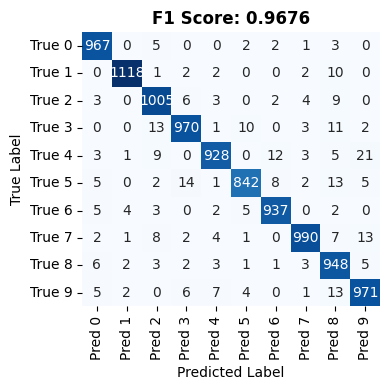

In [ ]:
np.random.seed(42)
# Define the neural network architecture using Linear layers with Adam optimizer
layers = [
    LinearAdam(n_features, 100),   # Input → Hidden layer with 100 neurons
    ReLU(),                        # Non-linear activation
    LinearAdam(100, 10),           # Hidden → Output layer with 10 neurons (digits 0-9)
    Softmax()                      # Converts outputs to probabilities
]

# Initialize the MLP with Cross-Entropy loss
mlp = MLP(layers, CrossEntropyLoss())

# Train the model using Adam optimizer
adam_loss_history, adam_accuracy_history = mlp.train(
    X_train, y_train, X_test, y_test,
    epochs=40,
    lr=0.01
)

# Predict probabilities for the test set
y_pred_probs = mlp.forward(X_test)  # Shape: (num_samples, num_classes)

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Plot confusion matrix to evaluate test performance
plot_confusion_matrix(y_pred, y_test)

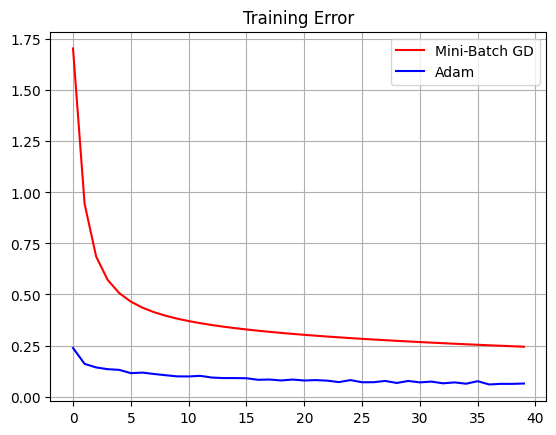

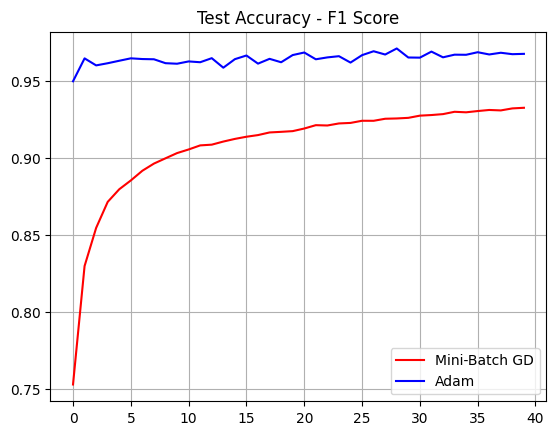

In [ ]:
n_epochs = 40

# Plot training losses
plt.plot(np.arange(n_epochs),loss_history,color='r',label='Mini-Batch GD')
plt.plot(np.arange(n_epochs),adam_loss_history,color='b',label='Adam')
plt.legend()
plt.grid()
plt.title('Training Error')
plt.show()

# Plot F1 Scores
plt.plot(np.arange(n_epochs),accuracy_history,color='r',label='Mini-Batch GD')
plt.plot(np.arange(n_epochs),adam_accuracy_history,color='b',label='Adam')
plt.legend()
plt.grid()
plt.title('Test Accuracy - F1 Score')
plt.show()

##**Regularization Algorithms**

From our very first lessons, we’ve been wrestling with a recurring theme in machine learning — **The Bias–Variance Tradeoff**.

At its core, this idea says:  
> **All the errors in our model’s predictions stem from two sources — bias and variance.**

---

###**High Bias (The "Too Simple" Problem)**
If our model makes overly simplistic assumptions about the data, it fails to capture its complexity.  
This means **high bias** — and the model is **underfitting**.

Example:  
Trying to fit a straight line to a wiggly-shaped data.  
No matter how we tweak it, the line will never fit the curves — it’s just too simple resulting in **Consistently wrong predictions** on both training and test data.

---

###**High Variance (The "Too Sensitive" Problem)**
If our model’s predictions change drastically when we slightly alter the training data, it’s overly sensitive.  
This is **high variance** — and the model is **overfitting**.

Example:  
A model that memorizes every detail of the training set — even irrelevant noise.  
It nails the training set perfectly but collapses when faced with new, unseen data.

Our goal is to land in the **sweet spot** — where both bias and variance are low enough to give **good generalization**.

Remember *Bholu the Elephant* from `Section00-Chapter00`?  
We don’t want Bholu so clueless that he can’t understand what to do when the trumpet sound rises (high bias), nor so overly attentive that he cares about irrelevant details like trumpet-player’s shirt color.

---

###**Inductive Bias**
We’ve already tried many tools to manage bias and variance:
- Tweaking **hyperparameters**
- Testing different **loss functions**
- Adjusting model **depth and width**
- Experimenting with **optimization strategies**

Now, we’ll introduce **our own knowledge about how real-world data behaves** into the model — deliberately.  
This is called **Inductive Bias**.
It’s like we’re telling our model:  
"Alright, I know that you can get every pattern and detail in the training data, but besides that I recommend you to consider this tip or hint as well, I believe it would help you better."  

And remember — we’re **not** forcing our own worldview onto the model. We’re not saying "do exactly as I say", but rather "here’s a little torch to guide you in the dark". Think of it like a teacher helping a student: the teacher doesn’t push all their personal assumptions into the student’s head, but sometimes shares a small insight from their own experience. That hint doesn’t block creativity — it just speeds up the journey.

Here are a few real examples of **inductive bias** in machine learning:

- **Image classification:**  
  When building a CNN for object recognition, we design convolutional layers because *we already know* that nearby pixels are related. Without this, the model would waste time learning pixel locality from scratch, possibly getting it wrong. (more on it in `Section05-Chapter00`)

- **Time series forecasting:**  
  We often feed recurrent layers (RNN, LSTM) or sliding windows into the model because *we know* that recent events influence the future more than distant ones. The model could eventually learn this pattern alone, but we hand it a flashlight.

- **Natural language processing:**  
  In language models, we tokenize text into words or subwords because *we already know* that meaning is carried in chunks, not just random character sequences. This saves the model from reinventing the concept of "words". (more on it in `Section06-Chapter00`)

By embedding certain assumptions into the training process, we can **guide the model toward better generalization** and help it avoid overfitting.

### **L1 Regularization (Lasso)**

**L1 regularization** adds a penalty equal to the sum of the absolute values of the weights to the loss function.  
The formula looks like this:

$$
\text{Loss}_{\text{total}} = J(w) + \lambda \sum_{j=1}^{n} |w_j|
$$

Where:  
- $J(w)$ is the loss from your original objective (e.g., MSE for regression, cross-entropy for classification).  
- $w_j$ are the model’s weights.  
- $\lambda$ is the regularization strength — higher values force the model to shrink weights more.  

---

The key property of L1 is that it can **drive some weights exactly to zero**, effectively removing irrelevant features.  
This makes it a useful tool for **feature selection** and for reducing overfitting when there are too many unnecessary inputs.

💡 **Example – Predicting Diabetes:**  
Imagine we get a dataset from a hospital with hundreds of patient features:  
- Some might be relevant: blood sugar level, BMI, blood pressure.  
- Some might be slightly relevant: age, exercise frequency.  
- Some might be irrelevant: number of siblings, favorite fruit, height (often not related for diabetes).  

If we train a model without regularization, it might give small but nonzero weights to almost everything, increasing complexity and the risk of overfitting.  
With **L1 regularization**, we’re essentially telling the model:  
> "Minimize the original prediction error, but also try to keep the sum of the absolute weights small, we want you to get rid of some of the ineffective features."  

This gentle nudge pushes the model to focus only on the features that truly matter, setting the rest to zero.

**In short:** L1 regularization not only helps control overfitting but also gives us a simpler, more interpretable model by ignoring useless features.

### **L2 Regularization (Ridge)**

**L2 regularization** adds a penalty equal to the sum of the squares of the weights to the loss function.  
The formula looks like this:

$$
\text{Loss}_{\text{total}} = J(w) + \lambda \sum_{j=1}^{n} w_j^2
$$

Where:  
- $J(w)$ is the loss from your main objective.  
- $w_j$ are the model’s weights.  
- $\lambda$ controls how strongly we penalize large weights.

---

The **squared term** here makes a big difference compared to L1:  
- In L1, large weights are penalized equally regardless of their size (absolute value).  
- In L2, large weights get **penalized much more strongly** because squaring amplifies bigger values.  
- This encourages the model to **spread the influence more evenly** across features rather than dropping some entirely to zero.

💡 **Example – Gene Expression Data for Disease Prediction:**  
Suppose we have a dataset with thousands of genes measured for each patient, and we want to predict the likelihood of a disease.  
- Each gene might contribute **a little** to the prediction.  
- Some genes are more influential, but we still believe that *many small contributions together* give a better overall signal.  

If we used L1, the model might drop many genes completely, potentially losing subtle signals.  
With **L2 regularization**, we’re telling the model:  
> "Minimize the prediction error, but also avoid making any weight too large — try to keep all weights small and balanced."  

Instead of removing features entirely, L2 keeps them in play but dampens their effect if they aren’t strongly predictive.  
This can be crucial when every feature could carry some weak but important information.

**In short:** L2 regularization helps avoid overfitting by smoothing weight values rather than cutting them out, making it especially useful when we expect many features to have small, shared contributions.

### **Dropout**

**Dropout** is one of the most powerful and elegant techniques to prevent overfitting in deep neural networks — and it does so without adding complex math or heavy computation.

Imagine you’ve built a large, sophisticated neural network for predicting diabetes, with hundreds or even thousands of parameters.  
Now, in your dataset, **fasting blood glucose level** turns out to be the most decisive feature — far more predictive than most others.  
During training, your network keeps spotting this strong signal and starts to rely heavily on it.

What happens next?  
Even though you’ve invested huge effort in designing a deep model, your network might end up behaving **almost like a simple linear model on that one feature**.  
The neurons connected to glucose dominate the learning process, suppressing the influence of other neurons, leaving much of your network underutilized.

---

This is a dangerous shortcut because:  
- What if **that feature is missing** for a new patient?  
- What if the value is **wrong** or **misleading** (e.g., it's actually a patient ID mislabeled as glucose)?  
- What if **other patterns** could help improve predictions, but the network never learned them because it got lazy?

---

#### **How Dropout Solves This**
During training, **Dropout randomly "switches off" some of the neurons** in each forward pass with a probability of $p$ and their output is going to be $0$.  
If a certain neuron (like the one linked to glucose) gets dropped out in some training steps, the network is **forced** to rely on other neurons and learn multiple alternative pathways for prediction.  
This means every neuron gets a fair chance to "speak up" and contribute to the decision.

You can think of it like a sports team: if your star player can’t always be on the field, the rest of the team learns to play better.

But...

Dropout is **not part of the final model** you deploy. It's just designed for the training phase. During inference (when your model is used in production), we want the network to be stable and predictable — no neurons should be randomly dropped, otherwise it would produce different results for the same sample.

However, there’s a catch:  
- During training, each neuron was active less often and received **smaller average input**. If $p=0.5$, every neuron is receiving half of the value it should receive, and they are trained with those values.   
- When we remove dropout during inference, the neuron outputs become **too large** compared to what they were tuned for, and that would cause problems.

To solve this problem during production, we **multiply neuron outputs by $p$**; it would properly scale the expected values for each of the neurons, and the values would match with the training phase.

---

**In short:**  
Dropout works like a form of *neural democracy* — by randomly silencing neurons during training, it ensures no single neuron becomes a dictator.  
The result is a more robust model that uses its parameters more evenly, making it less likely to fail when some inputs are missing, noisy, or misleading.

<div align="center">
  <img src="https://raw.githubusercontent.com/MamoMGD1/ML_101/main/images/S04_C00/dropout.png" width="500">
</div>

**Image Credit:** [Original Paper](https://jmlr.org/papers/v15/srivastava14a.html)

### **Other Regularization Techniques**

- **Elastic Net**  
  Combines **L1 (Lasso)** and **L2 (Ridge)** regularization.  
  - L1 encourages sparsity (some weights become exactly zero).  
  - L2 keeps weights small but non-zero.  
  Elastic Net balances the two, which is useful when we want feature selection **and** stability in coefficients.

- **Gaussian Noise**  
  Adds small, random noise (drawn from a Gaussian distribution) to inputs, activations, or weights during training.  
  This forces the model to learn patterns that are robust to slight variations — just like how humans can recognize a face even in a slightly blurry photo which proves that we aren't sufferring from overfitting.

##**Batch Normalization**
One of the most influential techniques introduced for training deep neural networks more efficiently is **Batch Normalization**, proposed by **Sergey Ioffe and Christian Szegedy in their 2015 paper** [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167).

The key idea is to reduce a phenomenon called **Internal Covariate Shift** — a fancy term for "the distribution of inputs to a layer keeps changing during training because the parameters of the previous layers keep updating."
Since layers in a neural network are chained together, even a small change in earlier layers can cause later layers to suddenly receive values in a totally different range.

Imagine a neuron that’s been happily receiving values between -2 and 2, adjusting its weights to work in that range. Then, after the previous layer updates its weights, that neuron suddenly gets values between -200 and -20. This neuron now has to **re-learn** how to handle its inputs, and while it’s doing that, the layer after it will also receive unexpected distributions and struggle to adapt. The effect cascades across the network.

This constant “catching up” slows training dramatically. Instead of fully focusing on finding a better solution, each layer spends a lot of effort just trying to adapt to the shifting distributions coming from earlier layers.

Batch Normalization tackles this by **normalizing the output of each neuron** across the current mini-batch during training so that they have a consistent distribution — typically zero mean and unit variance.

---

##**The Algorithm**

The mathematical form is straightforward.
For a batch of activations $x$ for a single neuron:

$$
\mu_B = \frac{1}{m} \sum_{i=1}^{m} x_i
$$

$$
\sigma_B^2 = \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_B)^2
$$

These are the **batch mean** and **batch variance** for that neuron. We then normalize:

$$
\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
$$

Here, $\epsilon$ is a small constant to avoid division by zero.

But normalization alone might limit the representational power of the network — what if the network actually *needs* a different mean or variance for that neuron to model the data well?
That’s why Batch Normalization introduces **learnable parameters** $\gamma$ and $\beta$:

$$
y_i = \gamma \hat{x}_i + \beta
$$

Here:

* $\gamma$ lets the neuron scale the normalized value.
* $\beta$ lets it shift the value.

This way, the network can recover any needed distribution if normalization alone is too restrictive — but it benefits from the stability and smoother optimization process provided by normalization.

###**Why To Use BN?**

The benefits go beyond just controlling Internal Covariate Shift:

* **Faster convergence** — networks train in fewer epochs.
* **Smoother loss surface** — optimization algorithms find better paths *(still under argument, see [original paper](https://arxiv.org/abs/1805.11604))*
* **Protection against vanishing/exploding gradients** — because normalization keeps activations in a healthier range.
* **Regularization effect** — the noise introduced by batch statistics can act like a form of regularization, sometimes reducing the need for Dropout or gaussian noise.

---

###**During Inference Phase**

During training, Batch Normalization uses batch statistics (mean, variance) from each mini-batch. But during inference (when the model is in production), we don’t have batches in the same sense. Instead, we use **moving averages** of the mean and variance collected during training to ensure stable, predictable outputs.

The net effect: Batch Normalization makes each layer far less sensitive to parameter changes in earlier layers, letting the entire network learn faster and more robustly.

In [ ]:
class LinearAdamBN(LinearAdam):
    def __init__(self, *args, momentum=0.9, epsilon=1e-5, **kwargs):
        super().__init__(*args, **kwargs)

        # BatchNorm parameters
        self.gamma = np.ones((1, self.out_features))  # Scale
        self.beta = np.zeros((1, self.out_features))  # Shift
        self.momentum = momentum
        self.epsilon_bn = epsilon

        # Running averages
        self.running_mean = np.zeros((1, self.out_features))
        self.running_var = np.ones((1, self.out_features))

    def forward(self, X, training=True):
        # Linear transformation
        z = super().forward(X)
        if training:
            batch_mean = np.mean(z, axis=0, keepdims=True)
            batch_var = np.var(z, axis=0, keepdims=True)

            # Normalize
            self.z_norm = (z - batch_mean) / np.sqrt(batch_var + self.epsilon_bn)

            # Store for backward
            self.batch_mean = batch_mean
            self.batch_var = batch_var

            # Update running averages
            self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * batch_mean
            self.running_var = self.momentum * self.running_var + (1 - self.momentum) * batch_var
        else:
            # Use running statistics
            self.z_norm = (z - self.running_mean) / np.sqrt(self.running_var + self.epsilon_bn)

        out = self.gamma * self.z_norm + self.beta
        return out

    def backward(self, grad_output, lr=0.001):
        # Backprop through scale and shift
        dgamma = np.sum(grad_output * self.z_norm, axis=0, keepdims=True)
        dbeta = np.sum(grad_output, axis=0, keepdims=True)

        m = grad_output.shape[0]
        dz_norm = grad_output * self.gamma

        # Backprop through normalization
        dvar = np.sum(dz_norm * (self.input @ self.W - self.batch_mean) * -0.5 *
                      (self.batch_var + self.epsilon_bn) ** (-1.5), axis=0, keepdims=True)
        dmean = np.sum(dz_norm * -1 / np.sqrt(self.batch_var + self.epsilon_bn), axis=0, keepdims=True) + \
                dvar * np.sum(-2 * (self.input @ self.W - self.batch_mean), axis=0, keepdims=True) / m

        dz = dz_norm / np.sqrt(self.batch_var + self.epsilon_bn) + \
             dvar * 2 * (self.input @ self.W - self.batch_mean) / m + \
             dmean / m

        # Backprop into weights using Adam optimizer
        grad_input = super().backward(dz, lr)

        # Update gamma and beta
        self.gamma -= lr * dgamma
        self.beta -= lr * dbeta

        return grad_input

class MLPBN(MLP):
    def forward(self, X, training=True):
        for layer in self.layers:
            # Pass training argument to the layers accepting it (i.e. not activation function)
            if hasattr(layer, "forward") and "training" in layer.forward.__code__.co_varnames:
                X = layer.forward(X, training=training)
            else:
                X = layer.forward(X)
        return X

Epoch    4: Loss=0.1145 | F1=0.9734
Epoch    8: Loss=0.0729 | F1=0.9775
Epoch   12: Loss=0.0540 | F1=0.9803
Epoch   16: Loss=0.0440 | F1=0.9812
Epoch   20: Loss=0.0370 | F1=0.9804
Epoch   24: Loss=0.0319 | F1=0.9778
Epoch   28: Loss=0.0287 | F1=0.9803
Epoch   32: Loss=0.0261 | F1=0.9805
Epoch   36: Loss=0.0243 | F1=0.9809
Epoch   40: Loss=0.0215 | F1=0.9825


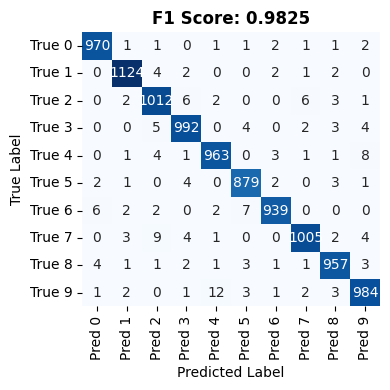

In [ ]:
np.random.seed(42)
# Define the neural network architecture using Linear layers with Adam + Batch Normalization
layers = [
    LinearAdamBN(n_features, 100),   # Input → Hidden layer with 100 neurons, normalized
    ReLU(),                          # Non-linear activation
    LinearAdamBN(100, 10),           # Hidden → Output layer with 10 neurons, normalized
    Softmax()                        # Converts outputs to probabilities
]

# Initialize the MLP with Batch Normalization and Cross-Entropy loss
mlp = MLPBN(layers, CrossEntropyLoss())

# Train the model using Adam optimizer with Batch Normalization
bn_loss_history, bn_accuracy_history = mlp.train(
    X_train, y_train, X_test, y_test,
    epochs=40,
    lr=0.1
)

# Predict probabilities for the test set
y_pred_probs = mlp.forward(X_test)  # Shape: (num_samples, num_classes)

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Plot confusion matrix to evaluate test performance
plot_confusion_matrix(y_pred, y_test)

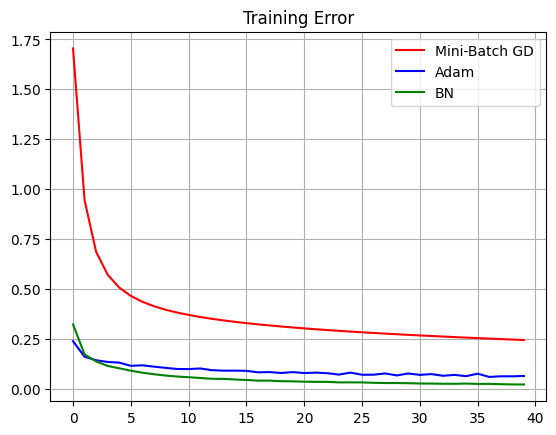

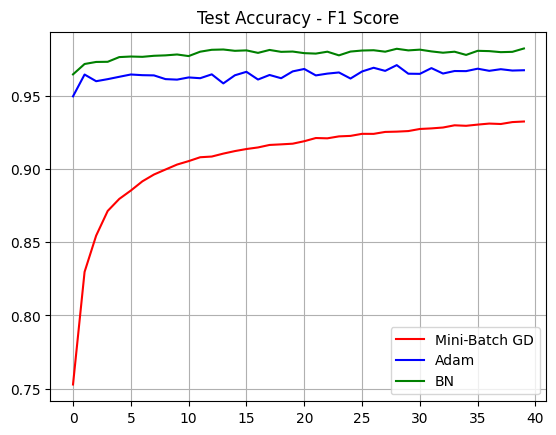

In [ ]:
n_epochs = 40

# Plot training losses
plt.plot(np.arange(n_epochs),loss_history,color='r',label='Mini-Batch GD')
plt.plot(np.arange(n_epochs),adam_loss_history,color='b',label='Adam')
plt.plot(np.arange(n_epochs),bn_loss_history,color='g',label='BN')
plt.legend()
plt.grid()
plt.title('Training Error')
plt.show()

# Plot F1 scores
plt.plot(np.arange(n_epochs),accuracy_history,color='r',label='Mini-Batch GD')
plt.plot(np.arange(n_epochs),adam_accuracy_history,color='b',label='Adam')
plt.plot(np.arange(n_epochs),bn_accuracy_history,color='g',label='BN')
plt.legend()
plt.grid()
plt.title('Test Accuracy - F1 Score')
plt.show()

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.0 MB/s eta 0:00:00


In [ ]:
from IPython.display import display, HTML, Javascript
from google.colab import output
import cv2
import PIL.Image as Image
import io
import IPython

canvas_html = """
<canvas id="canvas" width="280" height="280"
        style="border:1px solid #000; background-color: white;">
Your browser does not support the HTML5 canvas tag.
</canvas>
<br/>
<div style="width:280px; display:flex; justify-content: center; gap: 15px">
  <button onclick="clearCanvas()">Clear</button>
  <button onclick="submitCanvas()">Submit</button>
</div>
<script>
let canvas = document.getElementById('canvas');
let ctx = canvas.getContext('2d');
ctx.lineWidth = 40;
ctx.strokeStyle = "black";
ctx.lineCap = 'round';
let drawing = false;

canvas.onmousedown = (e) => {
  drawing = true;
  ctx.beginPath();
  ctx.moveTo(e.offsetX, e.offsetY);
};
canvas.onmousemove = (e) => {
  if (drawing) {
    ctx.lineTo(e.offsetX, e.offsetY);
    ctx.stroke();
  }
};
canvas.onmouseup = () => {
  drawing = false;
};

function clearCanvas() {
  ctx.clearRect(0, 0, canvas.width, canvas.height);
}

function submitCanvas() {
  let dataURL = canvas.toDataURL('image/png');
  google.colab.kernel.invokeFunction('notebook.get_drawing', [dataURL], {});
}
</script>
"""

display(HTML(canvas_html))
from base64 import b64decode
from io import BytesIO

# This is the callback when JS "submitCanvas()" is triggered
def get_drawing(data_url):
    header, encoded = data_url.split(",", 1)
    binary_data = b64decode(encoded)
    image_data = Image.open(BytesIO(binary_data)).convert("RGBA")  # Grayscale
    # Remove alpha by blending with white background
    bg = Image.new("RGBA", image_data.size, (255, 255, 255))
    image_data = Image.alpha_composite(bg, image_data).convert("L")

    # Resize and invert
    image_data = image_data.resize((28, 28), resample=Image.LANCZOS)
    img_array = np.array(image_data)
    img_array = 255 - img_array  # Invert colors
    img_array = img_array / 255.0  # Normalize
    img_array = img_array.flatten()
    img_array = np.append(1, img_array)

    # Predict the input image
    pred = mlp.forward(img_array, training=False)

    print("Model Prediction:", np.argmax(pred, axis=1))

output.register_callback('notebook.get_drawing', get_drawing)

## **Closing This Chapter**

We started this chapter by stacking perceptrons side by side, creating **layers of neurons** that mirror—at least in concept—the structure of neuron layers in our own brains. Each neuron performed a simple linear transformation, but as we connected these layers together, we could exploit them even more by introducing **non-linear activation functions**, which acted as the glue between our linear layers, unlocking the ability to build models that could capture *non-linear* patterns in data—something a purely linear stack could never do.  

From there, we explored **loss functions** as our way of measuring how far off our predictions were. By calculating the gradient of these losses in the last layer and applying the **backpropagation algorithm**, we propagated this “error signal” backwards through the network, adjusting every weight to reduce our loss and push our model toward better—and eventually optimal—solutions.  

Soon, we realized there was **no limit** to how many layers we could stack. Adding multiple **hidden layers** allowed our models to capture increasingly complex structures in data. We called this new network a **Deep Neural Network**.   

Similarly, there was **no limit to the number of neurons per layer**, leading to the idea of **Wide Neural Networks**. There is even a theorem which states that a neural network with just **one sufficiently wide hidden layer** can approximate *any* function with arbitrary precision. This theorem was **proposed by Marcos Eduardo Valle, Wington L. Vital, and Guilherme Vieira in their 2024 paper** [Universal Approximation Theorem for Vector- and Hypercomplex-Valued Neural Networks](https://arxiv.org/abs/2401.02277).   

But as we deepened our networks, we discovered the challenges:  
- **Vanishing and exploding gradients**  
- **Overfitting**  
- **Slow convergence**  
- **Getting trapped in local minima**  
- **High computational cost**  

These challenges pushed us to develop smarter **optimization** and **regularization** techniques, allowing us to train more efficiently, reduce overfitting, and move closer to optimal solutions without exhausting time and resources.  

---

## **What's Next?**
> **Convolutional Neural Networks (CNNs)**

Up to now, our deep neural networks have been built entirely with **dense (fully connected) layers**. In the next section, we’ll explore the *game-changer* in modern AI—**Convolutional Neural Networks**—the architectures that dominate **computer vision**, power image recognition systems, and form the backbone of many state-of-the-art AI breakthroughs.